<a href="https://colab.research.google.com/github/vchandraiitk/datascience/blob/main/Vikas_M8_NB_MiniProject_2_EDA_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Exploratory Data Analysis - Timeseries

## Problem Statement

Perform Exploratory Data Analysis (EDA) of Retail Sales time series data using visualizations and statistical methods.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform Exploratory data analysis (EDA) of the time series
* perform Time series behaviour analysis in qualitative and quantitative terms
* summarize the findings based on the EDA

## Dataset

The dataset is a French retail company quarterly sales data that has been made available from  Prof. Rob Hyndman's ["Forecasting Methods & Applications"](https://robjhyndman.com/forecasting/) book. There are 24 entries, from 2012-03-31 to 2017-12-31 (Quarterly sales values).

## Introduction

Exploratory data analysis of time series data starts with data visualization.

- Are there consistent patterns?
- Is there a significant trend?
- Is seasonality important?
- Is there evidence of the presence of business cycles?
- Are there any outliers in the data that need to be explained by those with expert knowledge?
- How strong are the relationships among the variables available for analysis?

Various tools have been developed to help with these analyses.

## Grading = 10 Points

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/ts_frenchretail.csv

### Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import scipy
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Import the Data

In [19]:
# Read dataset with 'Date' as index
# YOUR CODE HERE
df = pd.read_csv('ts_frenchretail.csv', parse_dates=['Date'], index_col='Date')

In [20]:
df.head(5)

,Sales
Date,
2012-03-31,362000
2012-06-30,385000
2012-09-30,432000
2012-12-31,341000
2013-03-31,382000


## Exploratory Data Analysis

### **Preprocessing** (1 point)

#### Divide the sales by 1000

Sales numbers are in thousands, so divide by 1000 to make it easier to work with numbers

In [21]:
# YOUR CODE HERE
df['Sales'] = df['Sales']/1000

#### Check for missing values     

In [22]:
# YOUR CODE HERE
df.isnull().sum()

,0
Sales,0


In [23]:
df.head(5)

,Sales
Date,
2012-03-31,362.0
2012-06-30,385.0
2012-09-30,432.0
2012-12-31,341.0
2013-03-31,382.0


### **Visualization**

#### Visualize the time series (2012 to 2017) (1 point)

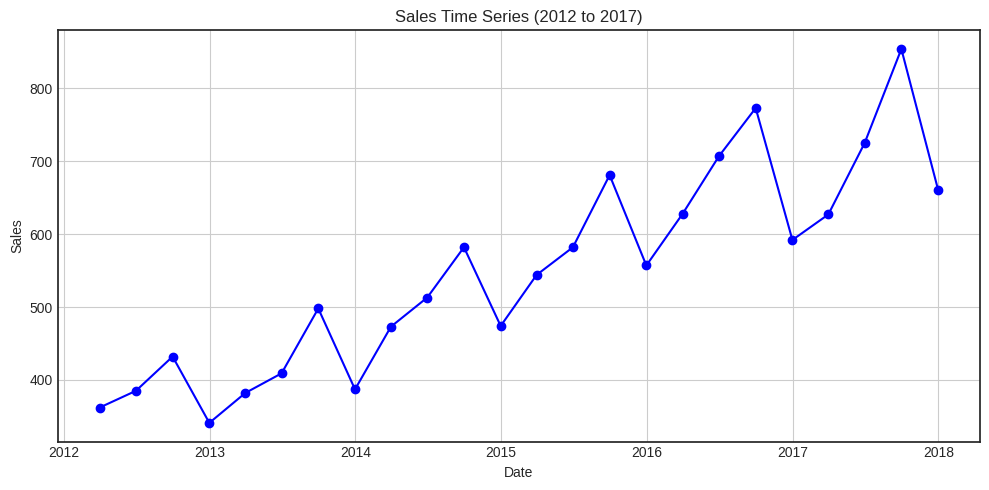

In [28]:
# YOUR CODE HERE
# Plot the time series
df_filtered = df[df.index < '2018-01-01']
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered['Sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Time Series (2012 to 2017)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visualize the data year-wise and quarter-wise (2 points)

- Box plot to see distribution of sales in each year
- Create year-wise subplots to visualize the quarterly Sales per year
- Compute Percentage growth each year

Make a report of your observations.

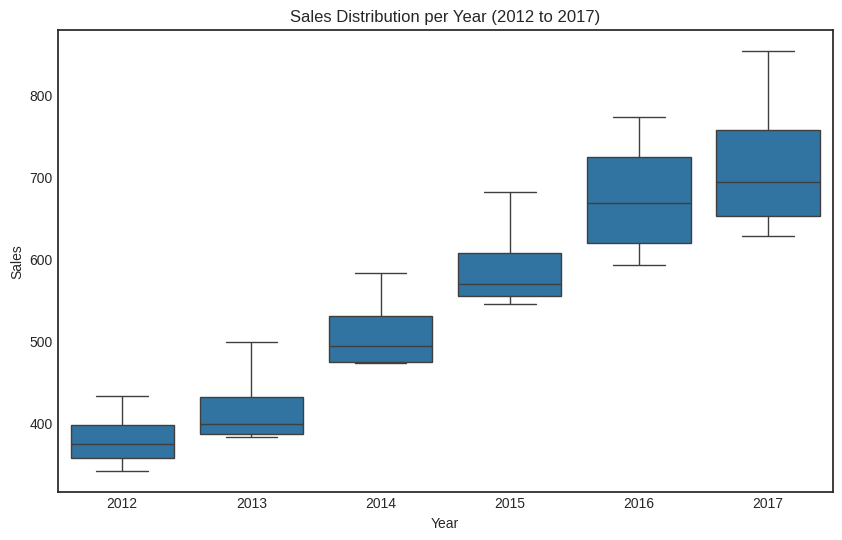

In [33]:
# Box plot to see distribution of sales in each year
# YOUR CODE HERE
# Plot the box plot: Sales distribution for each year
df['Year'] = df.index.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Sales', data=df)
plt.title('Sales Distribution per Year (2012 to 2017)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

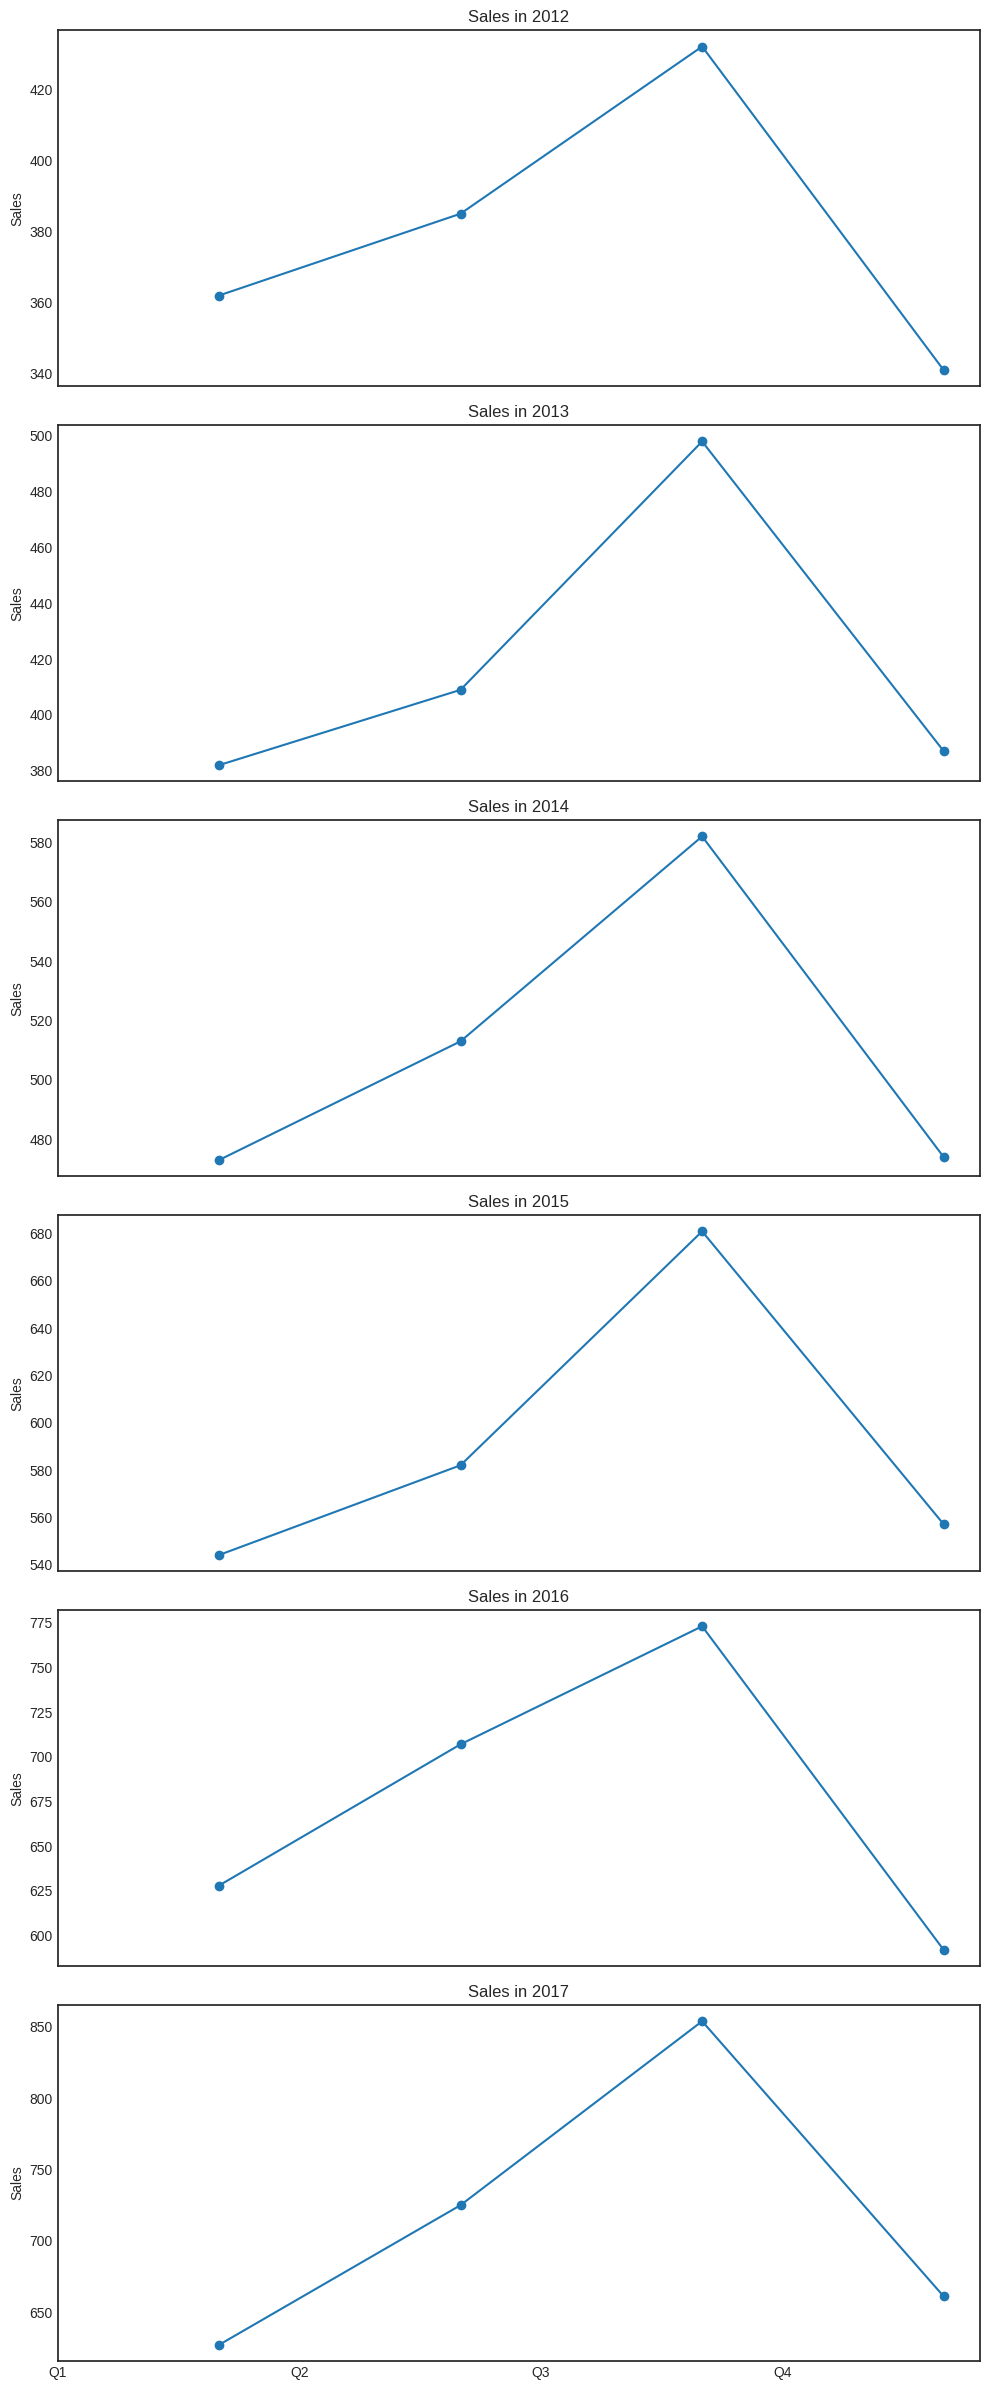

In [34]:
# Create year-wise subplots to visualize the quarterly Sales per year
# YOUR CODE HERE
# Create year-wise subplots to visualize the quarterly Sales per year
# YOUR CODE HERE

# Get unique years
years = df.index.year.unique()

# Create subplots
fig, axes = plt.subplots(len(years), 1, figsize=(10, 4 * len(years)), sharex=True)

# Iterate through years and plot
for i, year in enumerate(years):
    year_data = df[df.index.year == year]
    axes[i].plot(year_data.index.month, year_data['Sales'], marker='o', linestyle='-')  # Use month for x-axis
    axes[i].set_title(f'Sales in {year}')
    axes[i].set_ylabel('Sales')
    axes[i].set_xticks(range(1,13,3)) # Set x-axis ticks for each quarter
    axes[i].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4']) # Label x-axis ticks as quarters

plt.tight_layout()
plt.show()

In [35]:
# Percentage growth each year
# YOUR CODE HERE
yearly_sales = df.groupby(df.index.year)['Sales'].sum()

percentage_growth = yearly_sales.pct_change() * 100

print("Percentage Growth Each Year:")
print(percentage_growth)

Percentage Growth Each Year:
Date
2012          NaN
2013    10.263158
2014    21.837709
2015    15.768854
2016    14.213198
2017     6.185185
Name: Sales, dtype: float64


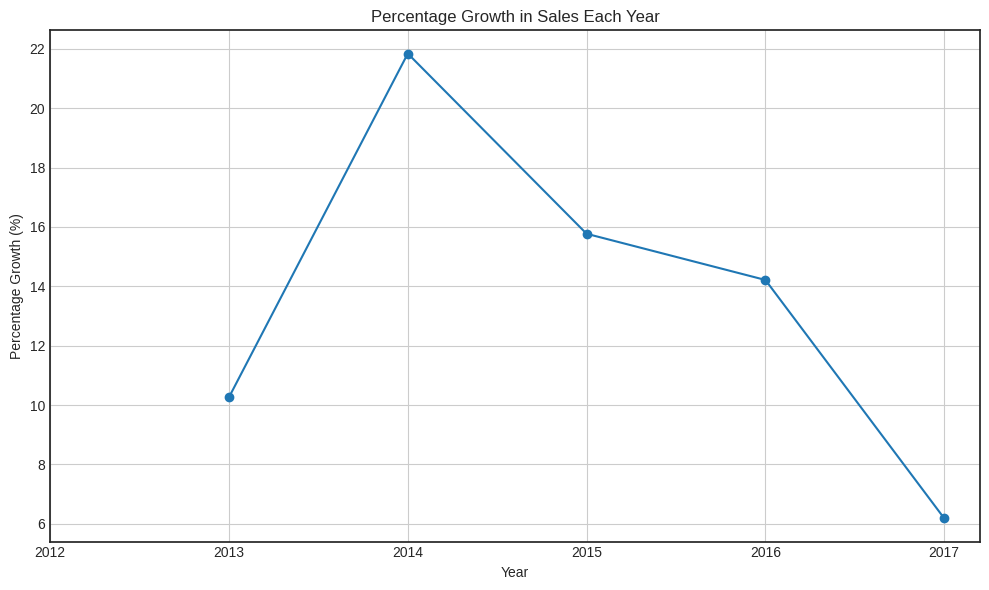

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(percentage_growth.index, percentage_growth.values, marker='o', linestyle='-')
plt.title('Percentage Growth in Sales Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage Growth (%)')

# Explicitly set x-axis ticks to integer years
plt.xticks(percentage_growth.index)

plt.grid(True)
plt.tight_layout()
plt.show()

#### Visualize the distribution of the Sales (0.5 point)

While normally distributed data is not a requirement for forecasting and doesn't necessarily improve point forecast accuracy, it can help stablize the variance and narrow the prediction interval.

Report your observations.

Hint: `sns.distplot()`

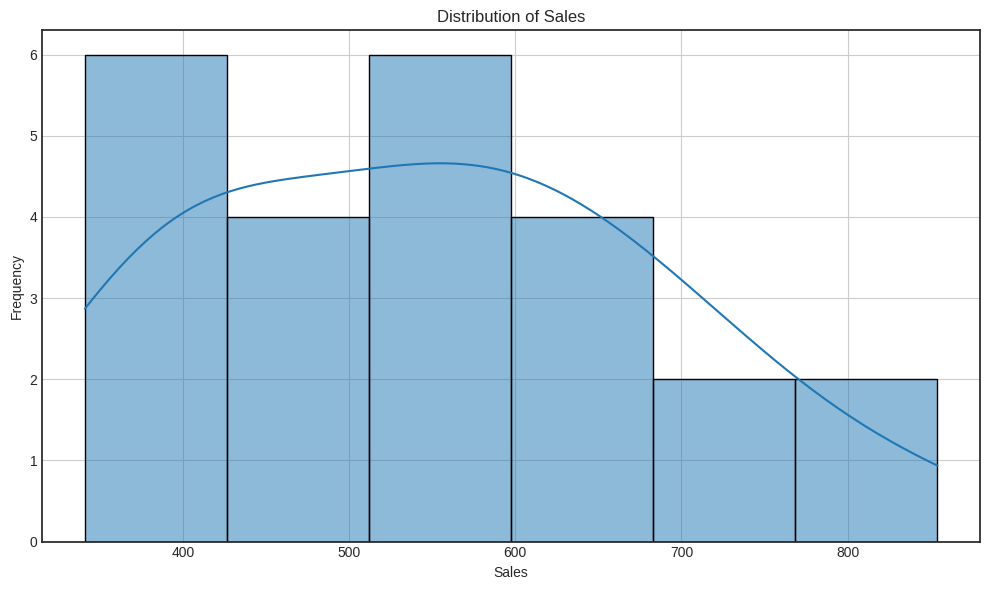

In [43]:
# YOUR CODE HERE

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)  # kde=True adds the KDE plot
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visualize Quarterly trends (1 point)

Create quarterly subplots to visualize the data in each quarter across all years

Hint: statsmodels' `quarter_plot()` method

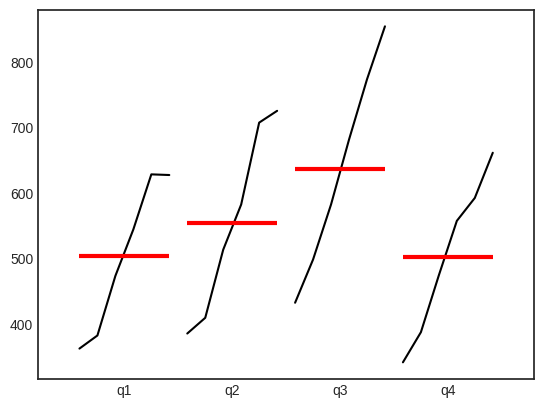

In [44]:
# YOUR CODE HERE
quarter_plot(df['Sales'])
plt.show()

#### Visualize the distribution of Sales in each year within a single plot (1 point)

- Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate?
- Is there a change in the width of the distributions from 2012 to 2017? What does it signify?

Hint: `sns.distplot(hist=False)`

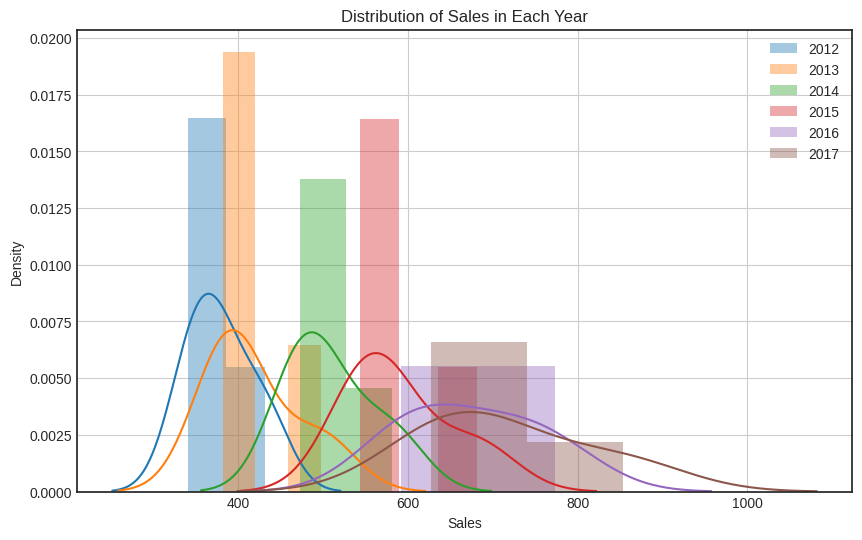

In [47]:
# Distribution plot of each year
# YOUR CODE HERE
plt.figure(figsize=(10, 6))

for year in df.index.year.unique():
    sns.distplot(df[df.index.year == year]['Sales'], label=year)

plt.title('Distribution of Sales in Each Year')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#### Visualize the quarterly sales for each year using a stacked bar plot (1 point)

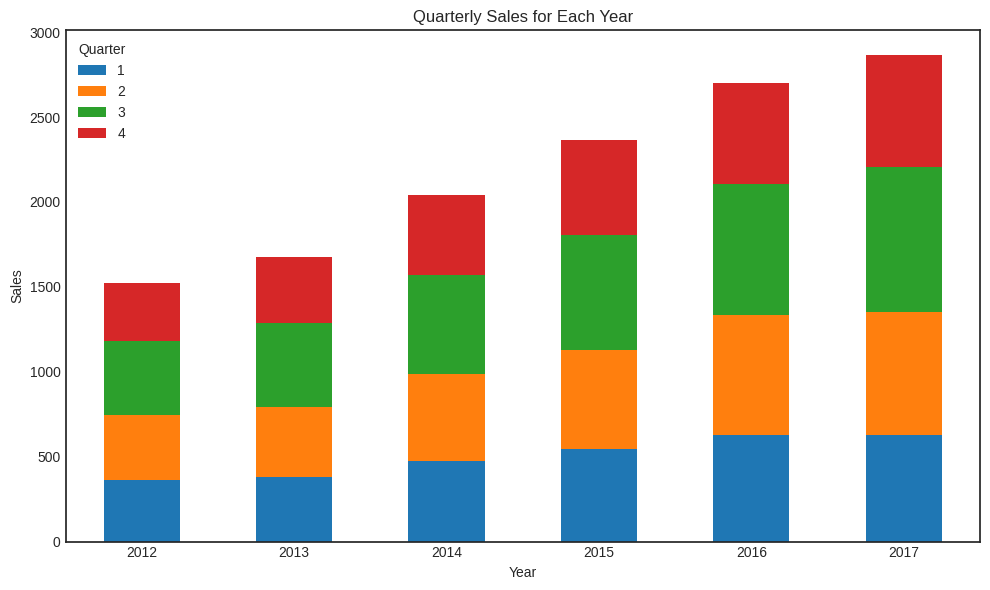

In [48]:
# Plot stacked bar plot
# YOUR CODE HERE
df['Year'] = df.index.year
df['Quarter'] = df.index.quarter

# Group by Year and Quarter and sum sales
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().unstack()

# Plot the stacked bar plot
quarterly_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quarterly Sales for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

#### Check if the time series data is stationary (1 point)

Hint:

For the series to be stationary, it must have:
 - constant mean
 - constant variance
 - constant covariance (uncorrelated)

Visualize if the mean is constant

Hint: [Rolling mean](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)

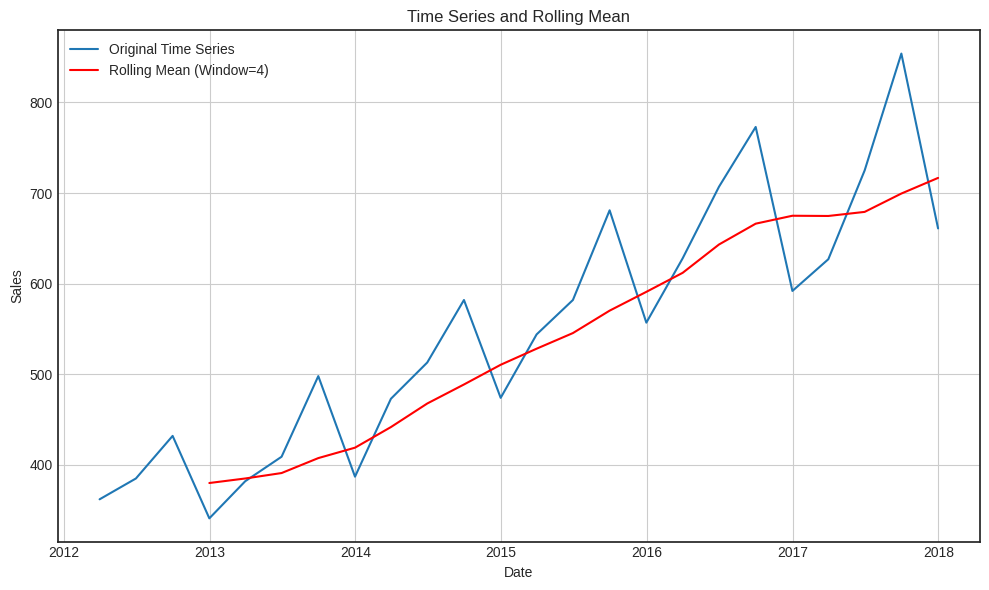

In [49]:
# Visualize Rolling mean
# YOUR CODE HERE
rolling_mean = df['Sales'].rolling(window=4).mean()

# Plot the original time series and the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean (Window=4)', color='red')
plt.title('Time Series and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Visualize if the variance is constant

Hint: [Rolling standard deviation](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.std.html)

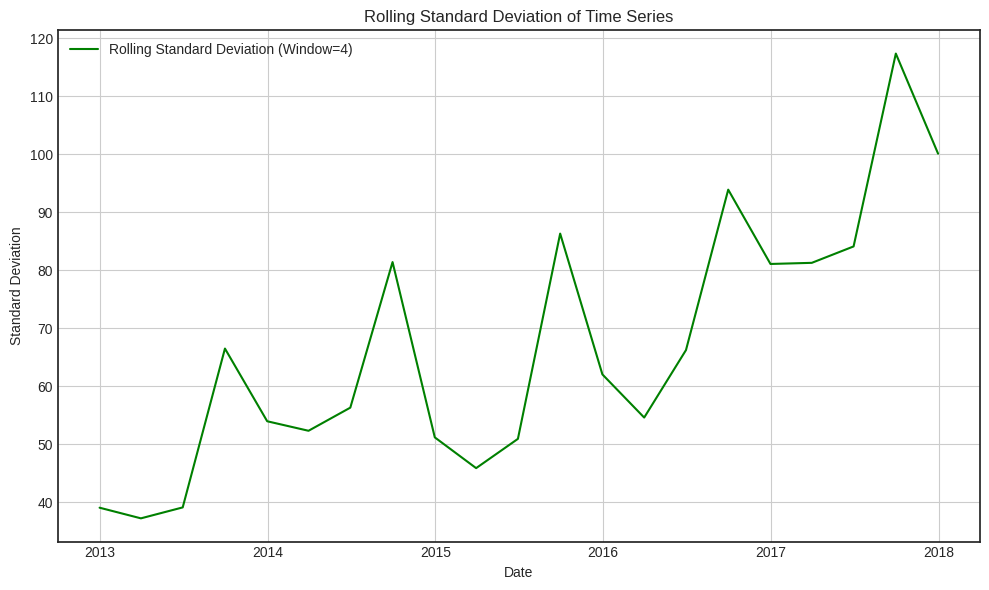

In [50]:
# Rolling standard deviation
# YOUR CODE HERE
rolling_std = df['Sales'].rolling(window=4).std()

# Plot the rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Standard Deviation (Window=4)', color='green')
plt.title('Rolling Standard Deviation of Time Series')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the observations report whether the series is stationary or not.

#### Visualize the patterns in time series - trend, seasonality, residuals (1 point)

Hint: See Module 8 - AST2 EDA > Patterns in a time series

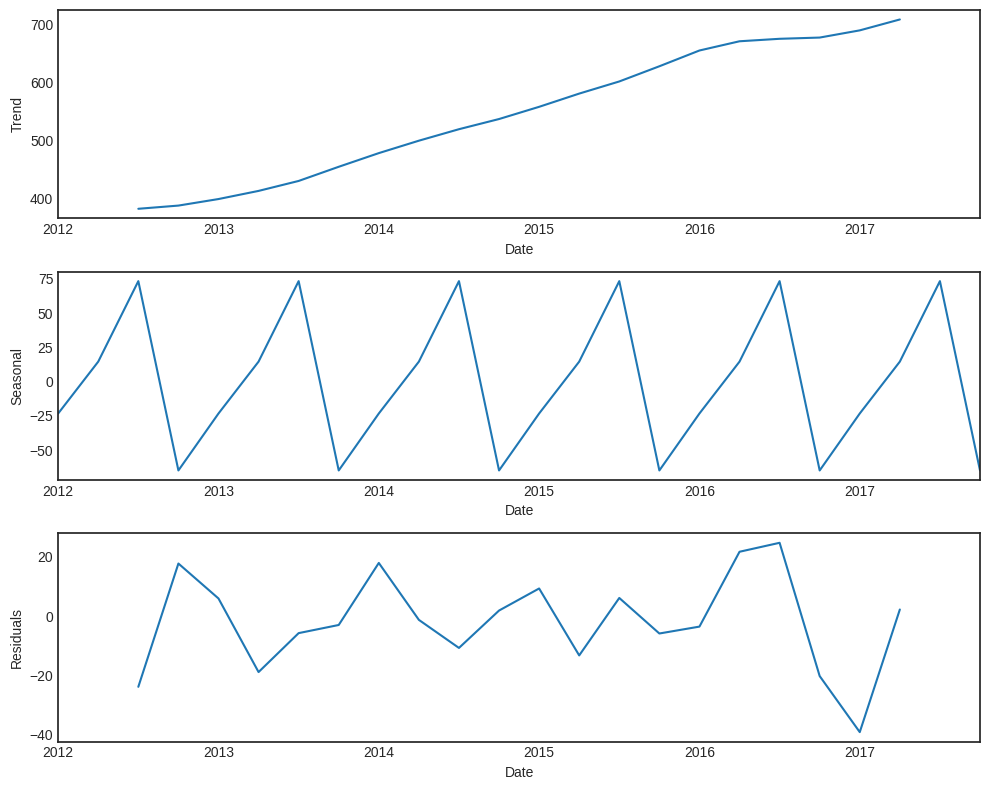

In [62]:
# Applying seasonal decompose
# YOUR CODE HERE
decomposition = seasonal_decompose(df['Sales'], model='additive', period=4)  # period=4 for quarterly data

# Plotting trend, seasonality
# YOUR CODE HERE
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))


decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax3)
ax3.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

Report if there are any observable patterns in terms of trend, seasonality , or cyclic behavior.

In [ ]:
# upward trend
# repeating up‐and‐down pattern each year, suggesting seasonal fluctuations
# no obvious multi‐year cyclical pattern and random noise

### **Detrending**

####  Detrend the time series (0.5 point)

Detrending a time series is to remove the trend component from a time series.

Hint:
- Subtract the line of best fit `scipy.signal.detrend()`

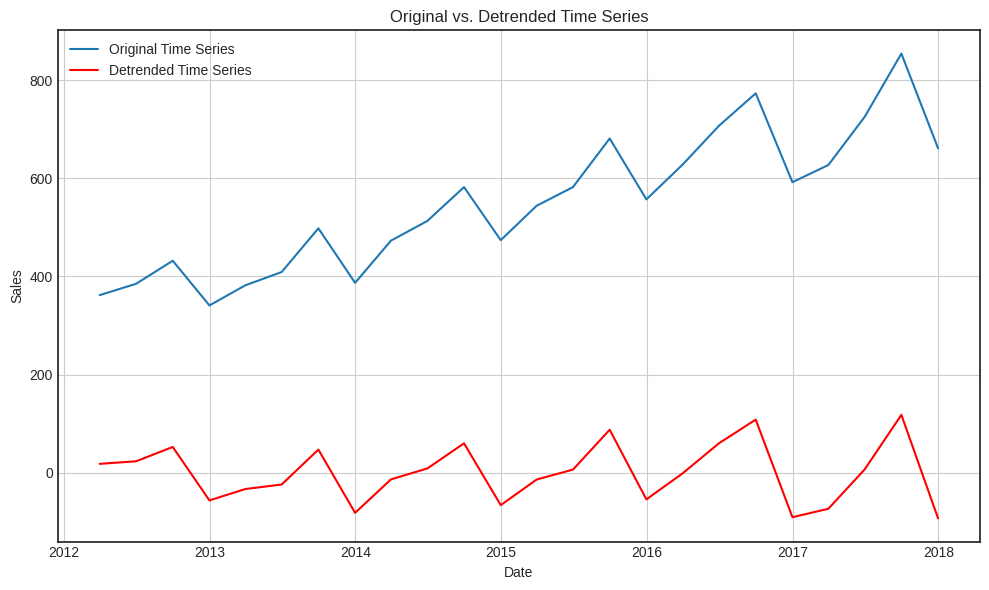

In [63]:
# YOUR CODE HERE
detrended_sales = signal.detrend(df['Sales'])

detrended_df = pd.DataFrame({'Sales': detrended_sales}, index=df.index)

plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Original Time Series')
plt.plot(detrended_df['Sales'], label='Detrended Time Series', color='red')
plt.title('Original vs. Detrended Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Lag Plots** (Optional)

#### Visualize the Lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

For reference, see Module 8 - AST2 > Lag Plots

Hint: `pandas.plotting.lag_plot()`

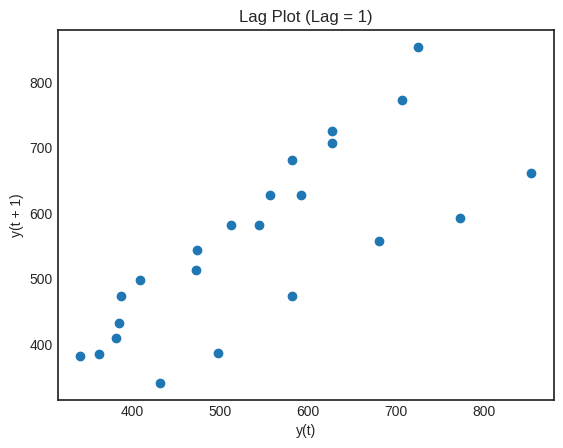

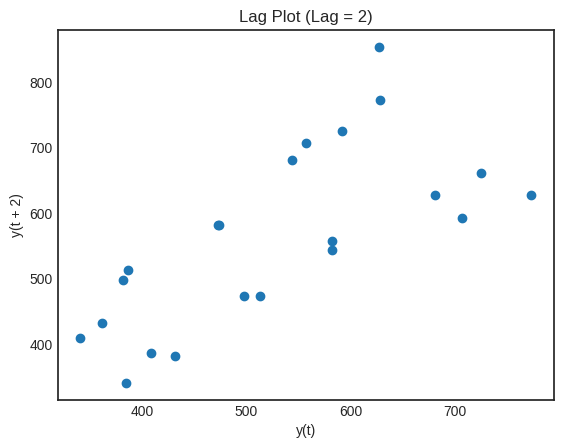

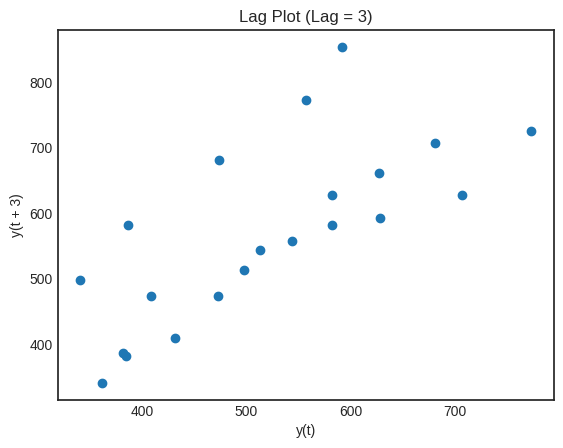

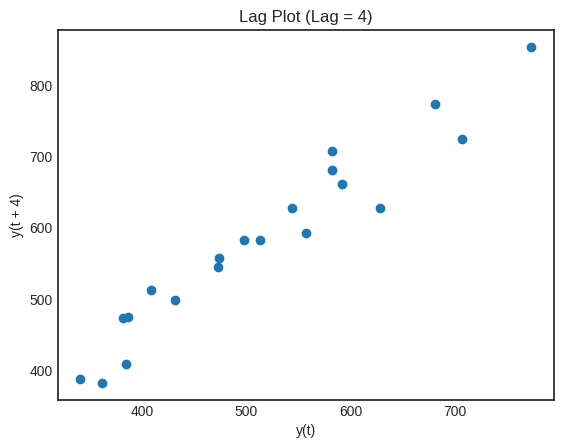

In [64]:
# Visualize lag plots
# YOUR CODE HERE
for lag in [1, 2, 3, 4]:  # You can adjust the lags as needed
    pd.plotting.lag_plot(df['Sales'], lag=lag)
    plt.title(f'Lag Plot (Lag = {lag})')
    plt.show()

### Report Analysis

- Give the summary about this time series

In [ ]:
#sales time series is strongly autocorrelated at lags 1, 2, 3, and 4, with the tightest correlation typically at shorter lags (lag=1) and slightly more scatter at higher lags.